In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("titanic.csv",
                   usecols=["cabin", "sex", "embarked", "survived"])

data.head( )

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [2]:
data["cabin"] = data["cabin"].astype(str).str[0]

data.fillna("Missing", inplace=True)

In [3]:
for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

survived :  2  labels
sex :  2  labels
cabin :  9  labels
embarked :  4  labels


In [4]:
data["cabin"].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'T', 'F', 'G'], dtype=object)

In [5]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["cabin", "sex", "embarked"]],
    data["survived"],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((916, 3), (393, 3))

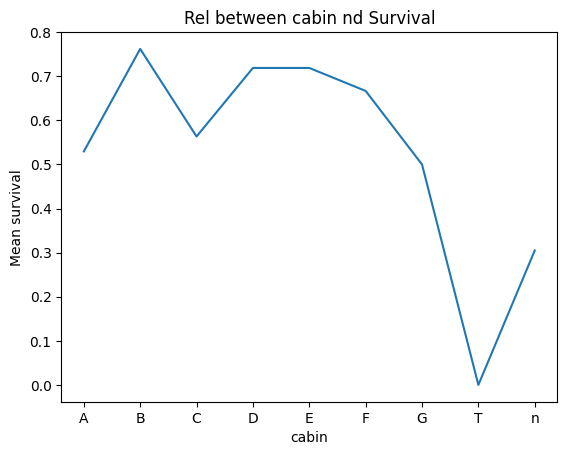

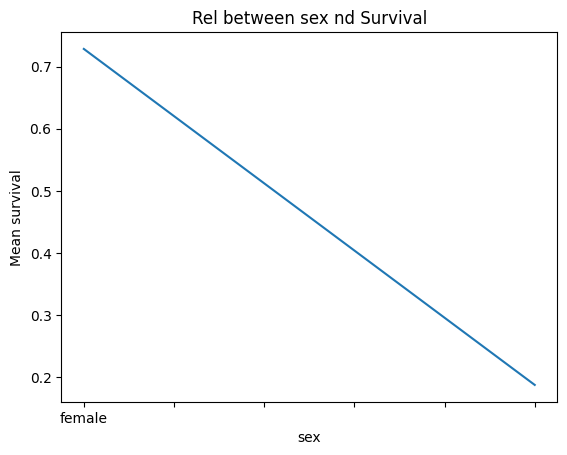

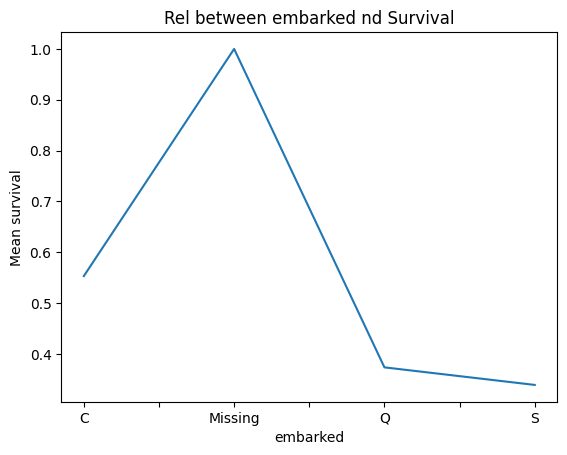

In [7]:
for var in ["cabin", "sex", "embarked"]:
    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Rel between {} nd Survival".format(var))
    fig.set_ylabel("Mean survival")
    plt.show()

In [8]:
y_train.groupby(X_train["cabin"]).mean()

cabin
A    0.529412
B    0.761905
C    0.563380
D    0.718750
E    0.718750
F    0.666667
G    0.500000
T    0.000000
n    0.304843
Name: survived, dtype: float64

In [10]:
ordered_labels = y_train.groupby(X_train["cabin"]).mean().to_dict()

ordered_labels

{'A': 0.5294117647058824,
 'B': 0.7619047619047619,
 'C': 0.5633802816901409,
 'D': 0.71875,
 'E': 0.71875,
 'F': 0.6666666666666666,
 'G': 0.5,
 'T': 0.0,
 'n': 0.30484330484330485}

In [11]:
X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

In [12]:
X_train["cabin"].head(10)

501     0.304843
588     0.304843
402     0.304843
1193    0.304843
686     0.304843
971     0.304843
117     0.718750
540     0.304843
294     0.563380
261     0.718750
Name: cabin, dtype: float64

In [13]:
def find_category_mappings(df, var, target):
    return target.groupby(df[var]).mean().to_dict()

def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [14]:
for variable in ["sex", "embarked"]:
    mappings = find_category_mappings(X_train, variable, y_train)
    integer_encode(X_train, X_test, variable, mappings)

In [15]:
X_train.head()

,cabin,sex,embarked
501,0.304843,0.728358,0.338957
588,0.304843,0.728358,0.338957
402,0.304843,0.728358,0.553073
1193,0.304843,0.187608,0.373494
686,0.304843,0.728358,0.373494


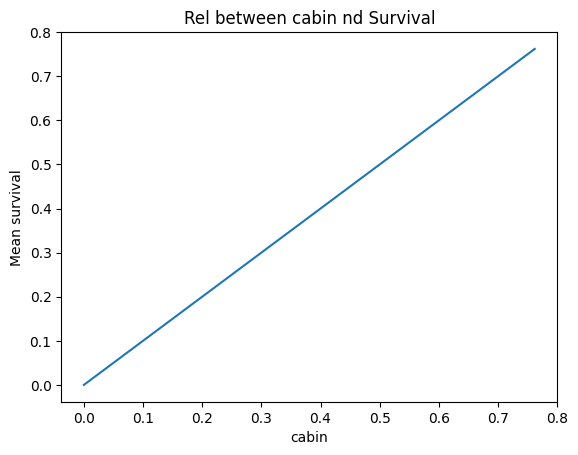

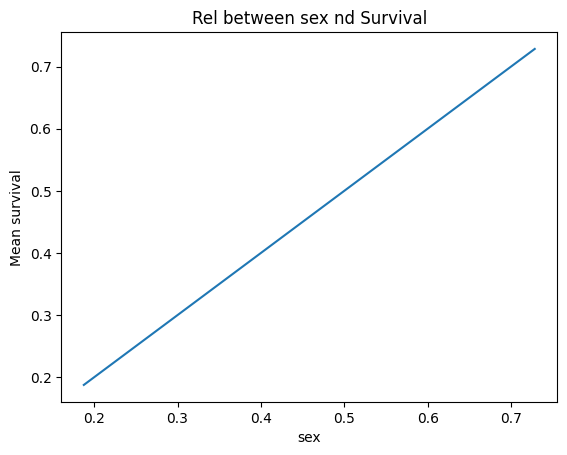

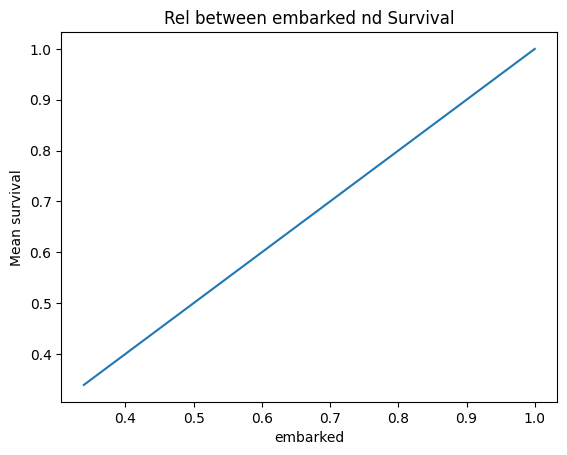

In [16]:
for var in ["cabin", "sex", "embarked"]:
    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Rel between {} nd Survival".format(var))
    fig.set_ylabel("Mean survival")
    plt.show()

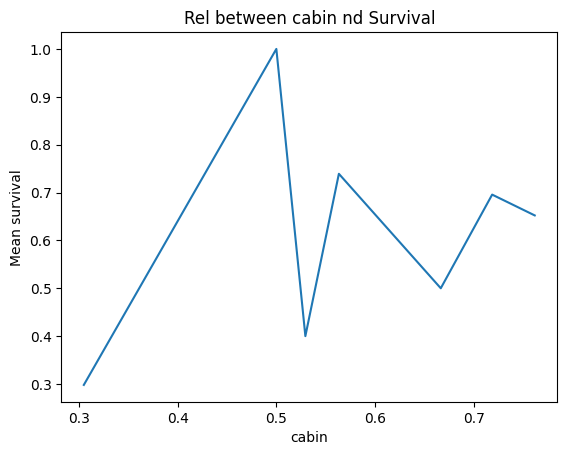

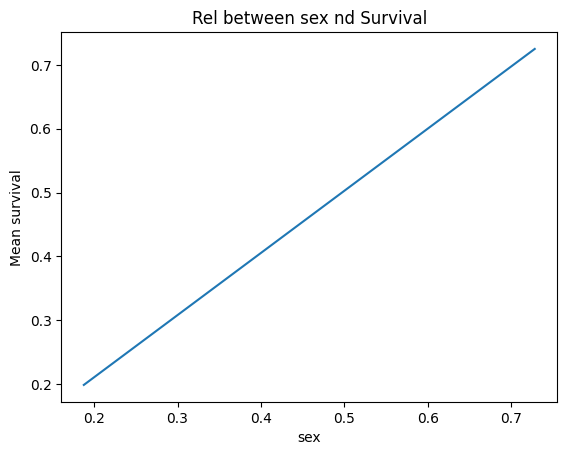

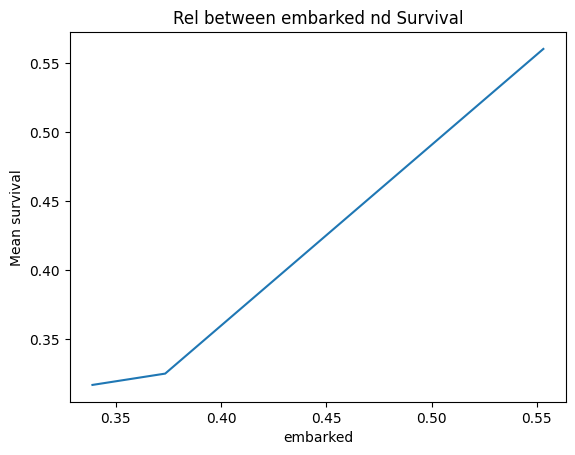

In [17]:
for var in ["cabin", "sex", "embarked"]:
    fig = plt.figure()
    fig = y_test.groupby(X_test[var]).mean().plot()
    fig.set_title("Rel between {} nd Survival".format(var))
    fig.set_ylabel("Mean survival")
    plt.show()